In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv("data_stocks.csv")

In [4]:
ds['DATE'].dtypes

dtype('int64')

In [5]:
ds['DATE'] = pd.to_datetime(ds['DATE'], unit='s')

ds['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [6]:
ds.index = ds['DATE']
ds.drop('DATE',axis = 1,inplace=True)
ds.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


# Forecasting for NASDAQ.AAPL

In [7]:
ds_AAPL = ds[['NASDAQ.AAPL']].copy()

In [8]:
ds_AAPL.tail()

,NASDAQ.AAPL
DATE,
2017-08-31 19:56:00,164.11
2017-08-31 19:57:00,164.12
2017-08-31 19:58:00,164.01
2017-08-31 19:59:00,163.88
2017-08-31 20:00:00,163.98


In [9]:
ds_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

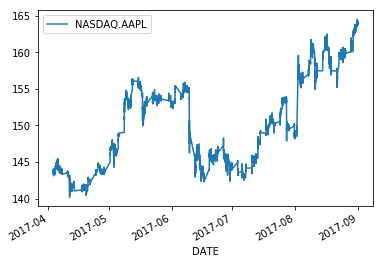

In [10]:
ds_AAPL.plot()

Stationary means mean,variance and covariance is constant over periods.

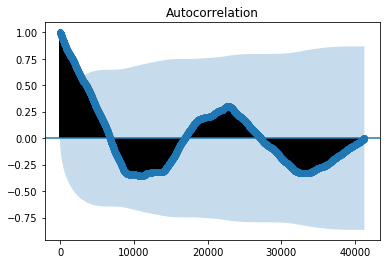

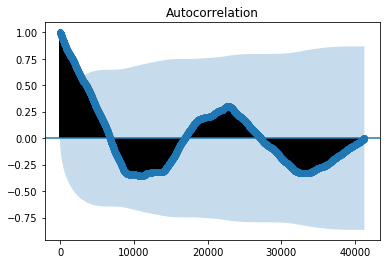

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_AAPL)

# Converting series to stationary

In [12]:
ds_AAPL.shift(1)

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,143.6800
2017-04-03 13:32:00,143.7000
2017-04-03 13:33:00,143.6901
2017-04-03 13:34:00,143.6400
2017-04-03 13:35:00,143.6600
2017-04-03 13:36:00,143.7800
2017-04-03 13:37:00,143.8640
2017-04-03 13:38:00,143.8100


In [13]:
X = ds_AAPL.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA Model

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [16]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 170326.9720446082
(0, 0, 1) 131018.03599865244
(0, 0, 2) 95780.67244459347
(0, 1, 0) -64708.71200636141
(0, 1, 1) -64706.87731534096
(0, 1, 2) -64718.28609667202
(0, 1, 3) -64719.67999909363
(0, 1, 4) -64724.746502434995
(0, 1, 5) -64723.273957570826
(0, 2, 0) -44617.132207470175
(0, 2, 1) -64678.28420151926
(1, 0, 0) -64703.10601232189
(1, 0, 1) -64701.25996944279
(1, 0, 2) -64712.567378777894
(1, 0, 3) -64714.01381690745
(1, 0, 4) -64719.00741340537
(1, 0, 5) -64717.5164734424
(1, 1, 0) -64706.87029558887
(1, 1, 1) -64714.63157427205
(1, 1, 2) -64725.38695947178
(1, 2, 0) -52566.600243591136
(1, 2, 1) -64686.65933766689
(1, 2, 2) -64694.12976421554
(1, 2, 3) -64689.76514385636
(1, 2, 4) -64699.297497167354
(1, 2, 5) -64699.32007189297
(2, 0, 0) -64701.25345154619
(2, 0, 1) -64709.05736238384
(2, 0, 2) -64719.706396486465
(2, 0, 3) -64717.71698006833
(2, 0, 4) -64716.799462557916
(2, 0, 5) -64715.504008617456
(2, 1, 0) -64717.93086809844
(2, 1, 1) -64725.403067054765
(2, 2, 

In [17]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64744.94423726782


In [18]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61361656, 150.61508183, 150.614859  , ..., 153.58403181,
       153.58427174, 153.58451166])

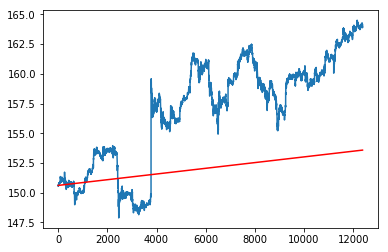

In [19]:
plt.plot(test)
plt.plot(predictions, color='red')

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.55151085148117

# Forecasting for NASDAQ.ADP

In [7]:
ds_ADP = ds[['NASDAQ.ADP']].copy()

In [8]:
ds_ADP.tail()

,NASDAQ.ADP
DATE,
2017-08-31 19:56:00,106.565
2017-08-31 19:57:00,106.590
2017-08-31 19:58:00,106.520
2017-08-31 19:59:00,106.400
2017-08-31 20:00:00,106.470


In [9]:
ds_ADP.count()

NASDAQ.ADP    41266
dtype: int64

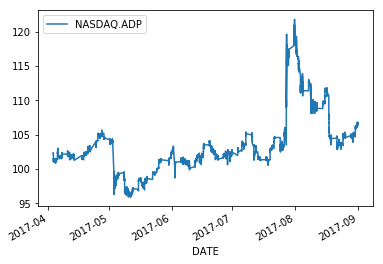

In [10]:
ds_ADP.plot()

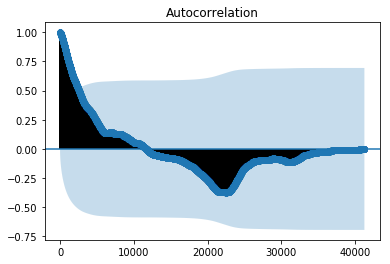

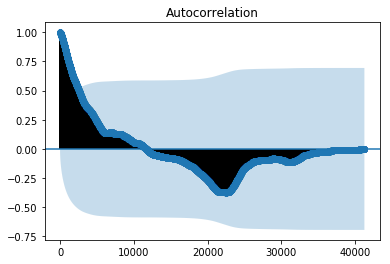

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_ADP)

# Converting series to stationary

In [12]:
ds_ADP.shift(1)

,NASDAQ.ADP
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,102.2300
2017-04-03 13:32:00,102.1400
2017-04-03 13:33:00,102.2125
2017-04-03 13:34:00,102.1400
2017-04-03 13:35:00,102.0600
2017-04-03 13:36:00,102.0400
2017-04-03 13:37:00,102.3300
2017-04-03 13:38:00,102.3700


In [13]:
X = ds_ADP.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA Model

In [16]:
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [17]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 124317.93290534396
(0, 0, 1) 85271.48908067054
(0, 1, 0) -80762.52187440007
(0, 1, 1) -81075.63405539679
(0, 1, 2) -81074.1728681155
(0, 1, 3) -81090.0071567385
(0, 1, 4) -81093.9847206518
(0, 1, 5) -81101.8757667083
(0, 2, 0) -63874.98955883522
(0, 2, 1) -80619.27213013051
(0, 2, 2) -80936.04768363845
(1, 0, 0) -80762.97956336921
(1, 0, 1) -81077.32276405522
(1, 0, 2) -81075.79810997652
(1, 0, 3) -81091.2645973993
(1, 0, 4) -81095.05246454725
(1, 0, 5) -81102.70785603981
(1, 1, 0) -81067.89180999978
(1, 1, 1) -81073.99649146204
(1, 1, 2) -81099.2410569745
(1, 1, 3) -81095.9904305218
(1, 2, 0) -70003.48847377118
(1, 2, 1) -80988.2023312846
(1, 2, 2) -80947.34892070795
(1, 2, 4) -81035.17791300321
(1, 2, 5) -81031.5441123313
(2, 0, 0) -81069.70670007085
(2, 0, 1) -81075.64369758981
(2, 0, 2) -81098.79258254182
(2, 0, 3) -81096.91027917521
(2, 1, 0) -81077.8655053549
(2, 1, 1) -81094.92273703193
(2, 1, 2) -81099.54378045718
(2, 1, 3) -81102.2379677377
(2, 2, 0) -72749.771102651

In [18]:
model_arima = ARIMA(train, order=(4,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-81128.91085880478


In [19]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([102.67236877, 102.67249743, 102.67191894, ..., 102.86041868,
       102.86043395, 102.86044922])

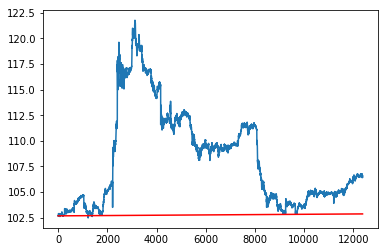

In [20]:
plt.plot(test)
plt.plot(predictions, color='red')

# Forecasting for NASDAQ.CBOE

In [25]:
ds_CBOE = ds[['NASDAQ.CBOE']].copy()

In [27]:
ds_CBOE.tail()

,NASDAQ.CBOE
DATE,
2017-08-31 19:56:00,100.89
2017-08-31 19:57:00,100.88
2017-08-31 19:58:00,100.86
2017-08-31 19:59:00,100.83
2017-08-31 20:00:00,100.89


In [28]:
ds_CBOE.count()

NASDAQ.CBOE    41266
dtype: int64

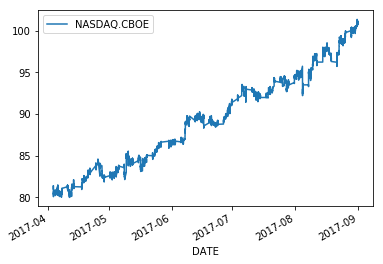

In [29]:
ds_CBOE.plot()

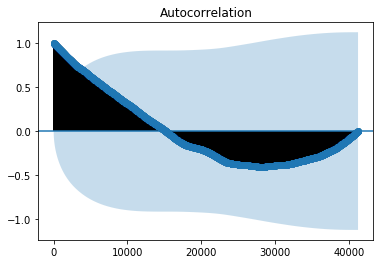

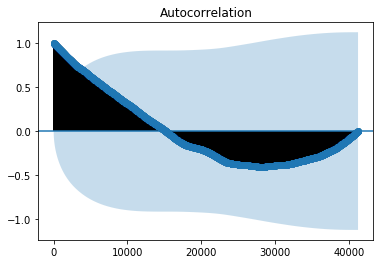

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_CBOE)

# Converting series to stationary

In [31]:
ds_CBOE.shift()

,NASDAQ.CBOE
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,81.0300
2017-04-03 13:32:00,81.2100
2017-04-03 13:33:00,81.2100
2017-04-03 13:34:00,81.1300
2017-04-03 13:35:00,81.1200
2017-04-03 13:36:00,81.2200
2017-04-03 13:37:00,81.1600
2017-04-03 13:38:00,81.1600


In [32]:
X = ds_CBOE.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA Model

In [33]:
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [34]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 160441.4526311847
(0, 0, 1) 120929.59019310394
(0, 0, 2) 84758.36964536618
(0, 0, 3) 55390.60392935455
(0, 0, 4) 31372.18520404792
(0, 0, 5) 13453.730162693828
(0, 1, 0) -96706.67408377732
(0, 1, 1) -96892.89650022525
(0, 1, 2) -96935.96404095054
(0, 1, 3) -96983.58417789279
(0, 1, 4) -97006.34469209127
(0, 1, 5) -97010.43101367731
(0, 2, 0) -74533.99722002604
(0, 2, 1) -96689.98891940528
(1, 0, 0) -96696.92223600348
(1, 0, 1) -96882.56874827266
(1, 0, 2) -96925.32067835293
(1, 0, 3) -96972.59913874295
(1, 0, 4) -96995.11573387746
(1, 0, 5) -96999.083405932
(1, 1, 0) -96878.5810170069
(1, 1, 1) -97008.39440809174
(1, 1, 2) -97009.50772281228
(1, 1, 3) -97011.95989995905
(1, 1, 4) -97010.37293923095
(1, 2, 0) -83690.5018605512
(2, 0, 0) -96868.3419158049
(2, 0, 1) -96994.58085066639
(2, 0, 2) -96995.52870372945
(2, 0, 3) -96998.26825901383
(2, 0, 4) -96996.79907968364
(2, 1, 0) -96917.69444348385
(2, 1, 1) -97009.65907551783
(2, 1, 2) -97018.18926768647
(2, 1, 3) -97010.117355

In [36]:
model_arima = ARIMA(train, order=(3,2,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-89306.9526749279


In [37]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([  92.49840669,   92.498007  ,   92.49224112, ..., -118.30994059,
       -118.33928932, -118.36864005])

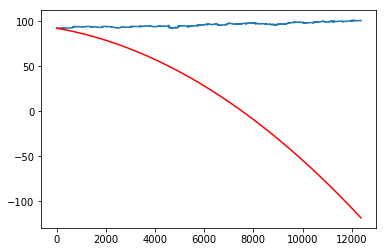

In [38]:
plt.plot(test)
plt.plot(predictions, color='red')

# Forecasting for NASDAQ.CSCO

In [39]:
ds_CSCO = ds[['NASDAQ.CSCO']].copy()

In [40]:
ds_CSCO.tail()

,NASDAQ.CSCO
DATE,
2017-08-31 19:56:00,32.185
2017-08-31 19:57:00,32.200
2017-08-31 19:58:00,32.200
2017-08-31 19:59:00,32.195
2017-08-31 20:00:00,32.225


In [41]:
ds_CSCO.count()

NASDAQ.CSCO    41266
dtype: int64

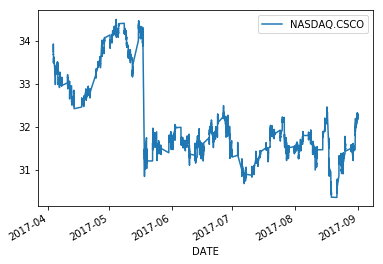

In [42]:
ds_CSCO.plot()

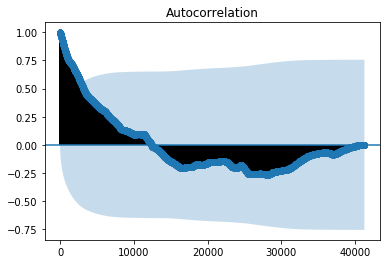

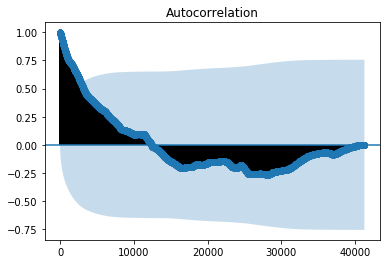

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_CSCO)

# Converting series to stationary

In [44]:
ds_CSCO.shift()

,NASDAQ.CSCO
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,33.7400
2017-04-03 13:32:00,33.8800
2017-04-03 13:33:00,33.9000
2017-04-03 13:34:00,33.8499
2017-04-03 13:35:00,33.8400
2017-04-03 13:36:00,33.8800
2017-04-03 13:37:00,33.9000
2017-04-03 13:38:00,33.8900


In [45]:
X = ds_CSCO.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA Model

In [46]:
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [47]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 85353.81423993816
(0, 0, 1) 46052.346167411204
(0, 1, 0) -135890.52761203377
(0, 1, 1) -135922.78479698207
(0, 1, 2) -135956.16202332312
(0, 1, 3) -135965.06574970618
(0, 1, 4) -136154.95023735648
(0, 1, 5) -136204.18413535092
(0, 2, 0) -116859.65854105703
(0, 2, 1) -135872.3301952898
(0, 2, 2) -135770.6167253345
(1, 0, 0) -135888.8526647139
(1, 0, 1) -135921.3729129046
(1, 0, 2) -135954.43801219435
(1, 0, 3) -135963.18872367791
(1, 0, 4) -136152.55604387505
(1, 0, 5) -136202.043477965
(1, 1, 0) -135920.5082373689
(1, 1, 1) -136015.15611626836
(1, 1, 2) -135999.85357076314
(1, 1, 3) -136003.85947166797
(1, 1, 4) -136198.18162257003
(1, 1, 5) -136202.18548550957
(1, 2, 0) -123906.59788290782
(1, 2, 1) -135902.59423762385
(1, 2, 2) -135688.113182156
(1, 2, 5) -136098.76315312652
(2, 0, 0) -135919.08768158103
(2, 0, 1) -136013.6306838829
(2, 0, 2) -135997.6167866998
(2, 0, 3) -136001.61647112112
(2, 0, 4) -136195.91077337554
(2, 0, 5) -136200.0478523378
(2, 1, 0) -135953.1597725

In [52]:
model_arima = ARIMA(train, order=(3,2,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-128364.87296316239


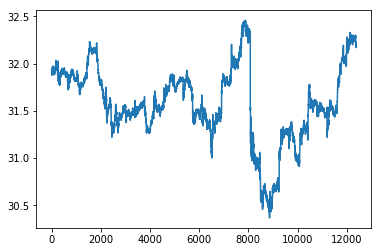

In [53]:
plt.plot(test)
plt.plot(predictions, color='red')

# Forecasting for NASDAQ.EBAY

In [7]:
ds_EBAY = ds[['NASDAQ.EBAY']].copy()

In [8]:
ds_EBAY.tail()

,NASDAQ.EBAY
DATE,
2017-08-31 19:56:00,36.135
2017-08-31 19:57:00,36.130
2017-08-31 19:58:00,36.130
2017-08-31 19:59:00,36.120
2017-08-31 20:00:00,36.130


In [9]:
ds_EBAY.count()

NASDAQ.EBAY    41266
dtype: int64

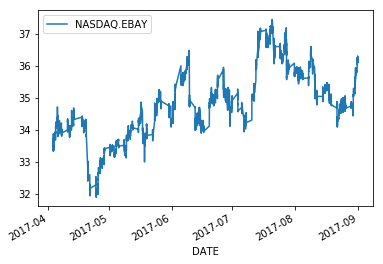

In [10]:
ds_EBAY.plot()

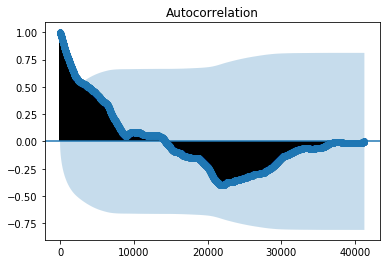

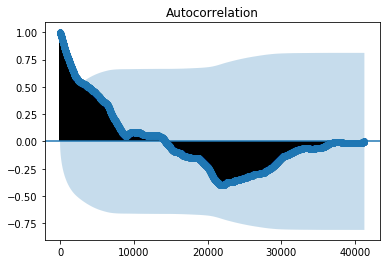

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_EBAY)

# Converting series to stationary

In [12]:
ds_EBAY.shift()

,NASDAQ.EBAY
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,33.3975
2017-04-03 13:32:00,33.3950
2017-04-03 13:33:00,33.4100
2017-04-03 13:34:00,33.3350
2017-04-03 13:35:00,33.4000
2017-04-03 13:36:00,33.4300
2017-04-03 13:37:00,33.4650
2017-04-03 13:38:00,33.5300


In [18]:
X = ds_EBAY.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA Model

In [19]:
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [20]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 83955.30612486275
(0, 0, 1) 44870.4712539689
(0, 0, 2) 10868.508581996532
(0, 0, 3) -16163.890333936259
(0, 0, 4) -36365.395048963706
(0, 0, 5) -52172.39235195969
(0, 1, 0) -135861.67620322722
(0, 1, 1) -135872.06503249455
(0, 1, 2) -135881.64202048111
(0, 1, 3) -135879.96802306047
(0, 1, 4) -135890.92338632874
(0, 1, 5) -135891.29428122332
(0, 2, 0) -115231.90591287252
(0, 2, 1) -135836.89946555684
(1, 0, 0) -135857.40095265277
(1, 0, 1) -135867.62575724535
(1, 0, 2) -135877.36292601965
(1, 0, 3) -135875.6615751708
(1, 0, 4) -135886.44796167742
(1, 0, 5) -135886.89006181553
(1, 1, 0) -135872.54671056976
(1, 1, 1) -135876.1491251199
(1, 2, 0) -124334.88501038733
(1, 2, 1) -135810.09686396865
(1, 2, 2) -135827.53289365082
(1, 2, 3) -135829.73613712908
(1, 2, 4) -135809.67629334977
(1, 2, 5) -135828.15645896376
(2, 0, 0) -135868.10452360206
(2, 0, 1) -135871.73483282494
(2, 0, 2) -135875.4610000405
(2, 1, 0) -135881.26959517505
(2, 1, 1) -135879.2853571144
(2, 1, 2) -135892.039

In [21]:
model_arima = ARIMA(train, order=(3,2,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-129229.25108105766


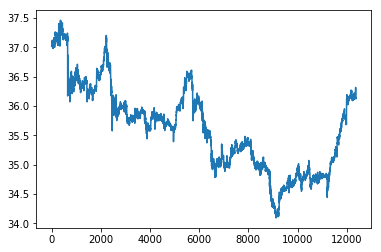

In [22]:
plt.plot(test)
plt.plot(predictions, color='red')